<div id="container" style="position:relative;">
<div style="float:left"><h1> Intro to Neural Networks </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

Today we will begin looking at Neural Networks. In the last few years Neural Networks have exploded in popularity. Now, much of machine learning research and the news surrounding it ususally involve neural networks. Many of the recent advances in machine learning come from deep learning, which just refers to using more complex neural networks.

We will get into deep learning in a future lecture, for now we will introduce the basics of neural networks. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def PlotBoundaries(model, X, Y) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y,s=20, edgecolor='k')
    plt.show()

### The Basics

A Neural Network is essentially several simple models strung together. We've seen the power of this technique before with decision trees. The basic model in a Neural Network is the Neuron, named after the neurons in our brains (an early goal of Neural Networks was to simulate the human brain). We will go into details of what a neuron is later, but for now it suffices to know they take in any number of numerical inputs to calculate a single numerical output.

<img src="https://i.imgur.com/0Cow9XW.png" width=300 height=300>

The Network is divided into several layers, often hundreds, but they can be groupped into 3 categories:

1. Input Layer: This layer represents the underlying features of our independent variable. If our data has $d$ features we will have $d$ input units. 
2. Hidden Layer: The hidden layer(s) transform the input features into a format that is useful for classifying the data. The more hidden layers, and the more units in each layer, the more powerful the overall model is. State of the art networks for complex tasks like image recognition and autonomous driving, have dozens hidden layers (or even hundreds).
3. Output Layer: This layer represents the output choice of the model. For classification tasks we have one unit per class, each neuron represents a possible class.

In the most basic setup each neuron in layer $i$ is connected to every neuron in layer $i+1$. A connection, or edge, from neuron $a$ to neuron $b$ passes the output of $a$ forward as one of many inputs to $b$. In the above example, each hidden layer neuron can receives information and can learn from each input feature. If we have more hidden layers, each neuron in a subsequent hidden layer can learn important information from each hidden layer neuron before it, and hence incorporate the information of all previous hidden layers and input features. The final output layer is the culmination of all of this information, which easily incorporates multi-label classification as well as binary classification.

### The Neuron

A neuron is simply a function $f$ mapping its various inputs into a new output. Let's focus on the first blue neuron in the picture below. Its inputs are the outputs of each of the individual green neurons:

$$f_{a1},\cdots,f_{a4}$$

It's actually more complex than that. Each edge has a weight attached to it:

$$w_1,\cdots,w_4$$

The true input to the blue neuron is:

$$x = w_1 \cdot f_{a1} + w_2 \cdot f_{a2} + w_3 \cdot f_{a3} + w_4 \cdot f_{a4}$$

<img src="https://i.imgur.com/ElDxxsn.png" width=300 height=300>

The output of the hidden layer neurons, including $f_b$, is some (usually non-linear) function of its input. Common choices include:

**Sigmoid Function**

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

**Hyperbolic Tangent Function**

$$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

**Rectified Linear Unit (ReLu) Function:**

$$ReLu(x) = max(0,x)$$

Let's visualize these activations:

In [3]:
x = np.arange(-5,5,0.1)

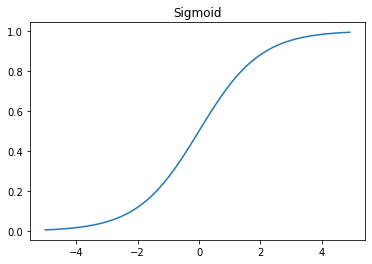

In [4]:
sig = 1 / (1 + np.exp(-x))
plt.plot(x,sig)
plt.title("Sigmoid")
plt.show()

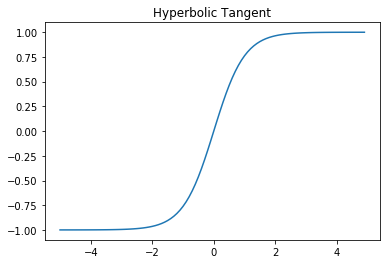

In [5]:
tanh = np.tanh(x)
plt.plot(x,tanh)
plt.title("Hyperbolic Tangent")
plt.show()

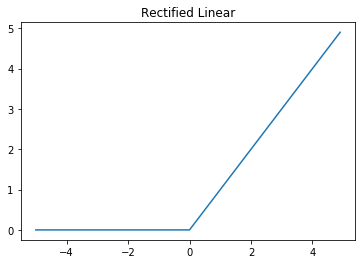

In [6]:
ReLu = np.maximum(np.zeros(len(x)),x)
plt.plot(x,ReLu)
plt.title("Rectified Linear")
plt.show()

While the choice of function can be important for some tasks, the main point is that they introduce non-linearity into the model. If the output of a neuron were just the identity function:

$$\mathbb{I}(x) = x$$

The neural network would only be able to learn linear decision boundaries, even if it had millions of hidden units. 

Historically, Sigmoid and Hyperbolic Tangent have been popular, but they have had issues with deep networks, (we will touch on those later). ReLu is very popular now, they can be used to train deep networks efficiently and have other nice properties. For this lecture, since the data we are dealing with is simple, we'll mainly use the Sigmoid function.

### Non Linear of (Non Linear of (Non Linear of (Non Linear of (...)...)))

The main reason Neural Networks are so powerful is because they are able to combine several simple non-linear models to make a decision. Take the previous example, the output of the blue neuron, $f_b$. If we are using the sigmoid activation then the output is a combination of all the previous outputs:

$$f_b = \sigma (w_1 \cdot f_{a1} + w_2 \cdot f_{a2} + w_3 \cdot f_{a3} + w_4 \cdot f_{a4})$$

Where each $f_i$ could be of a similar structure. We are essentially learning a non-linear function of several non-linear functions, each of which is made of several non-linear functions which in turn are made of several non-linear functions, and so on...

<img src="https://i.imgur.com/ElDxxsn.png" width=300 height=300>

This is the simplest network structure, where each neuron in layer $i$ passes its output to each neuron in layer $i+1$. We can have more complex models where neurons can skip layers, only communicate with specific neurons in subsequent layers or even pass messages to previous layers. We will see more about these advanced structures in future lectures.

### Complexity of the Network

As a general rule of thumb more Neurons in each layer and more layers lead to more complex decision boundaries. Let's actually fit and model the decision boundary of several networks. We'll talk about how the fitting happens later, but for now let's just visualize how network complexity affects the decision boundaries. We'll use some synthetic data:

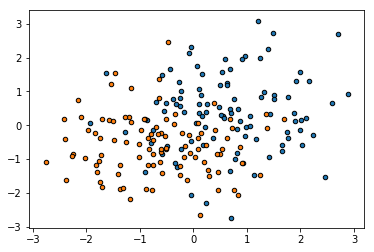

In [3]:
#Generate some data
np.random.seed(123)

points_per_class = 100

mean = [0.5,0.5]
cov = [[1,0],[0,1]]
x_one = np.random.multivariate_normal(mean, cov, (points_per_class))
y_one = np.full((points_per_class),0)

mean = [-0.5,-0.5]
cov = [[1,0],[0,1]]
x_two = np.random.multivariate_normal(mean, cov, (points_per_class))
y_two = np.full((points_per_class),1)

X = np.concatenate((x_one,x_two),axis=0)
y = np.concatenate((y_one,y_two),axis=0)

#Plot
plt.scatter(x_one[:, 0], x_one[:, 1], s=20, edgecolor='k')
plt.scatter(x_two[:, 0], x_two[:, 1], s=20, edgecolor='k')
plt.show()

Let's now fit a network. We'll use the following package to implement a basic neural network:

In [4]:
from sklearn.neural_network import MLPClassifier

There are two parameters of interest, `hidden_layer_sizes` and `solver`. The first determines the shape of the hidden layers, we pass that in as a tuple of integers where the integer in position $i$ determines how many hidden units are in layer $i$. The second tells scikit-learn how to fit the network to the data. The solver we used, the *LBFGS* algorithm, is good for smaller problem instances. In general we won't use scikit-learn to train neural networks. Instead we use packages like *Keras*, *TensorFlow*, *PyTorch*, etc., which are all specifically designed for neural networks.

Let's fit a simple network of one hidden unit:

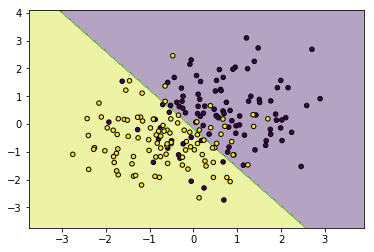

In [5]:
NN_model = MLPClassifier(hidden_layer_sizes=(1),solver='lbfgs')
NN_model.fit(X,y);

PlotBoundaries(NN_model, X, y)

Since there was only one hidden unit, the network is unable to learn anything complex. It's not learning non-linear features of non-linear features. It's effectively just a logistic regression model. But what happens when we add in more units and hidden layers? Let's plot the decisions of increasingly complex networks:

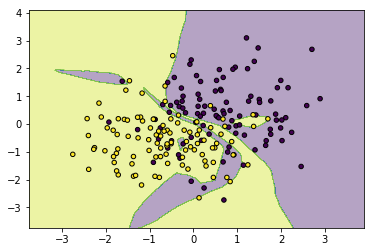

In [6]:
NN_model = MLPClassifier(hidden_layer_sizes=(40,40,40,40,40,40,40), solver='lbfgs')
NN_model.fit(X,y);

PlotBoundaries(NN_model, X, y)

The larger, more complex, network is able to learn more complex boundaries. It is highly non-linear and able to fit almost any data. It's also basically impossible to interpret what it is doing under the hood. We basically treat them as a black box, feeding in the inputs and receiving the outputs.

### How To Fit a Network

Now that we've seen how a neural network works and have run a few configurations of them, we can look at how they fit to data. Before we know how the network is adjusted we need to understand *what* is being adjusted. Recall, a network is made of individual neurons, which have an activation function, such as the sigmoid activation:

$$f_a(x) = \frac{1}{1+e^{-x}}$$

Where $x$ is a weighed sum of the outputs of output of the neurons in the previous layer ($L$):

$$x = \sum_{i \in L} w_{ia} \cdot f_i$$

So the output of a Neuron is really just:

$$f_a = \frac{1}{1+e^{-\sum_{i \in L} w_{ia}\cdot f_i}}$$

This looks pretty similar to logistic regression. (Actually, when using the sigmoid activation, each neuron *is* just a logistic regression function.) What did we adjust when fitting logistic regression? The weights! So to fit a network we just need to adjust the underlying edge weights. 

### Backpropagation

To adjust the edge weights we use a process called backpropagation. It is essentially the opposite of the forward feed phase. 

Recall, to make a prediction, the network took the input features and passed them through the hidden units one layer at a time, eventually reaching the output layer to make a prediction. Once we have the network output, we can compare it to the dependent variable. Any errors in the prediction are fed backwards through the network. Starting from the last layer of neurons, we update the weights to correct for the output error, we then correct the second last layer of weights, then the third last, and so on. 

The reason we propagate the corrections backwards is because we propagated the outputs forward. Since the output of layer $i$ depends on the outputs of layer $i-1$, the correction to layer $i-1$ depends on the correction to layer $i$. The actual math underlying this is a bit beyond the scope of this course. 

### Objective Function and Soft-Max

When we say propagate the error backwards, what do we mean? 

As with models like Logistic Regression or Boosting, we have a cost function that we are aiming to minimize. This cost function serves as a nice proxy for our goal, such as classification accuracy, so by minimizing it we should be maximizing accuracy. This is exactly the same as previous models we've seen, but now we need to be a bit careful with how we update model parameters. To actually understand what is going on with the objective, let's look at the outputs in more detail. Let's say we are trying to predict one of four classes with some activation function $f$. We'll have four outputs in the final layer on some input value $x$:

1. $f_1(x)$
2. $f_1(x)$
3. $f_1(x)$
4. $f_4(x)$

For now let's just say the output layer is using the identity function, so the output of each neuron is unbounded (in either direction). We can create a probability distribution with these values if we divide each by the sum of all of them:

$$f_i^{prob}(x) = \frac{\exp(f_i(x))}{\sum_j \exp(f_j(x))}$$

This ensures each $f_i^{prob}$ is between 0 and 1 and they all sum to 1. This is called the ___soft-max activation___, which turns the output of our network into a probability distribution, where the output is the probability our network assigns to a point belonging to a particular class. Using these soft-max values we can compare against the true class label using the cross-entropy loss:

$$cost(x) = - \sum_i \mathbb{I}(y=i) \log{f_i^{prob}(x)}$$

Here, for a data point $(x,y)$ only the output of the neuron with the actual class label $y$ contributes to the error, the higher the probability it assigns to class $y$ the lower this value becomes. The basic objective of the learning algorithm is to minimize this cost, actually the sum of the cost of all the training points, by adjusting the edge weights.

<img src="https://i.imgur.com/0Cow9XW.png" width=300 height=300>

### Gradient Decent

When running the backpropagation phase, we don't actually find the optimal value for each weight in one pass. Instead we make several passes making small iterative updates each time. This is because we don't have a way to find the optimal setting of the weights, we can only make improvements that can lead us to a better setting.

Consider the following image, it shows the contribution to the cost (the vertical axis) of a neuron with two weights (the two horizontal axis).

<img src="http://i.imgur.com/Ud0YGqX.png" width=400 height=400>

We want to set the weights so we're at the minimum cost, or the smallest error, but it can be hard to evaluate where that is. This is especially difficult with thousands of weights feeding into a neuron. Instead we employ a process called gradient decent. 

We iteratively update the weights moving them in a direction which lowers the error. We do this by calculating the gradient, or direction of most change, and adjust the weights slightly in this direction. By applying gradient descent over and over again, we make progress towards a better and better solution. Each backpropagation pass makes an adjustment to the weights, normally we repeat the process for a fixed number of rounds or until there is no significant change. Each round of this is called an epoch.

One important point, the gradient points in the direction of the change but it does not tell us how much of a step to make, instead we control the magnitude of the step with the `learning_rate_init`. Setting the `learning_rate_init` can be tricky, too small and we'll take a long time to converge to a good solution, too high and we'll overshoot where we wanted to end up. There are also issues with never finding optimal solutions if the learning rate is too low...

We've actually been using the `lbfgs` solver up until now, it is similar to gradient descent but the `learning_rate_init` parameter is ignored. To see the impact of `learning_rate_init` you need to switch the solver to something like `sgd`.

### Sub-Optimal Solutions

While gradient descent points in the direction of a *better* solution, it may not lead to the *optimal* solution. Consider the following example of a neuron with one weight. From some starting points, if we follow the steepest path downward we will end up trapped in a local minimum. There is a far better solution, the global minimum, but gradient descent may never discover it.

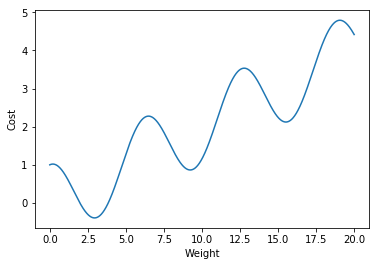

In [45]:
x = np.arange(0,20,.01)
plt.plot(x,np.cos(x)+x/5)
plt.ylabel("Cost")
plt.xlabel("Weight")
plt.show()

Most of the time we can't expect to find the global minimum, and instead end up trapped in local minimum. This usually isn't an issue since the local ones still tend to be pretty good.

### Escaping Local Minimum

One technique used to escape a local minimum is `momentum`. 

You can think of gradient descent as rolling a ball down a hill. The hill is our error surface, and the location of the ball is the current setting of model's weight parameters. The gradient points in the direction of the most change, or where gravity would pull our ball, and the learning rate represents how hard gravity is pulling on the ball. But this analogy isn't perfect. After doing an update of model parameters, we have no memory of what direction we just tweaked the weights. For the next round of updates we are essentially starting over. But with the ball rolling down a hill, there is *memory* between moments. It builds up momentum so that even if we reach the bottom of a hill, it may have enough built-up momentum to keep rolling over the crest of the next hill.

Using the `momentum` parameter, we can implement something very similar with our neural networks. When updating a model parameter we can incorporate the previous update into the current update. This often allows us to escape local minima, leading to better solutions.

Again consider the surface from above, how could momentum help us here?

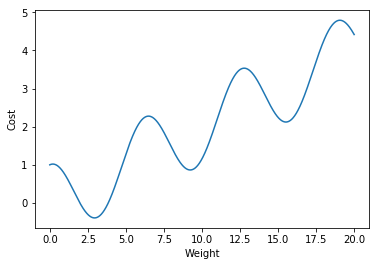

In [47]:
x = np.arange(0,20,.01)
plt.plot(x,np.cos(x)+x/5)
plt.ylabel("Cost")
plt.xlabel("Weight")
plt.show()

Let's look at this comparison (taken from the TensorFlow page) of optimization methods with two parameters:

<img src="https://www.tensorflow.org/images/opt1.gif" width=300 height=300>

While this shows gradient descent getting stuck in a local minimum, this is not always the case. As mentioned these "smarter" methods can end up in worse settings of values. Generally they tend to do better, but as with almost all things we've seen, there is no perfect answer.

### Stochastic Gradient Descent

After our network makes a prediction, we said the error is propagated backwards so that the weights could be updated, but what does this mean? 

Every time we feed in an input, each of the output neurons, one per class, makes some prediction about the class label. Based on the data label and network prediction we may have some error. We can feed the rest of the training set through the network and accumulate all of the errors. This accumulation of all the errors is what is fed back through the network in gradient descent. 

There is an issue with this: To make *one* update of the network parameters, we need to calculate the accumulated error of the *entire* training set. This means we may need to make hundreds of thousands of forward passes before we begin to tune the network parameters.

In practice, we do the backpropagation updates in *batches*. We calculate the accumulated error for a small subset of the entire training set, called a mini-batch, and use it to update the network parameters. We repeat the process updating the network parameters using only small subsets of the data. This process is called stochastic gradient descent, since in expectation the combination of all updates should match the full training set update.

To visualize the effects of regularization let's fit a model with the default `alpha` parameter, $0.00001$:

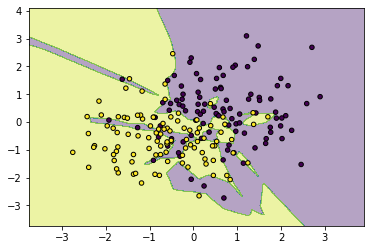

In [28]:
NN_model = MLPClassifier(solver='lbfgs')
NN_model.fit(X,y);

PlotBoundaries(NN_model, X, y)

It's learned pretty non-linear boundaries, they aren't even in connected regions, if we instead fitted a model with a much higher regularization parameter:

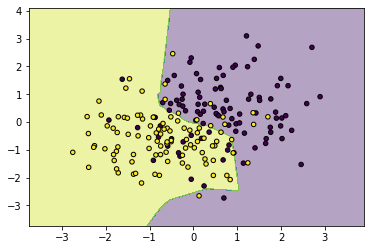

In [29]:
NN_model = MLPClassifier(alpha = .3, solver='lbfgs')
NN_model.fit(X,y);

PlotBoundaries(NN_model, X, y)

We see the boundary is much simpler. There aren't as many disjoint components or jagged edges.

What happens if we really crank up the regularization?

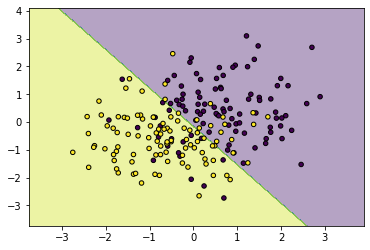

In [30]:
NN_model = MLPClassifier(alpha = 10, solver='lbfgs')
NN_model.fit(X,y);

PlotBoundaries(NN_model, X, y)

This looks almost like a logistic regression. What went wrong (or right)? To understand what is going on the first thing we must note is the default activation function here is the sigmoid function:

$$f_a(x) = \frac{1}{1+e^{-x}}$$

And graphically this looks like:

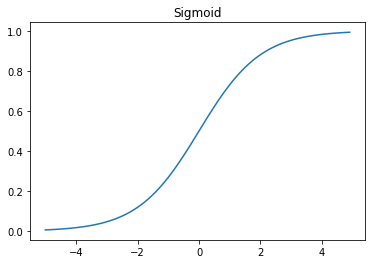

In [51]:
x = np.arange(-5,5,0.1)

sig = 1 / (1 + np.exp(-x))

plt.plot(x,sig)
plt.title("Sigmoid")
plt.show()

Recall the $y$ axis represents the strength of the output of a neuron while the $x$ axis represents the aggregate of all its inputs. notice the middle of the $x$ axis near 0, it's almost linear:

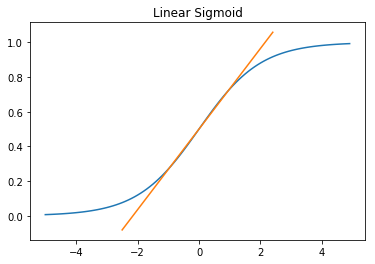

In [52]:
plt.plot(x,sig)
plt.plot(x[25:75],(x/4.3 + .5)[25:75])
plt.title("Linear Sigmoid")
plt.show()

This means if we keep the total input to a neuron within a small range around 0 then the output will almost be a simple linear function of the input. 

So what role does the regularization play in all of this? Recall the $L2$ regularization punishes large edge weights by imposing an additional term on the cost function:

$$\sum_{(ij) \in E} w_{ij}^2$$

This encourages all of the edge weights to be near 0, which means that when we feed in the activation values to some neuron:

$$ w_1 x_1 + w_2 x_2 + \cdots + w_k x_k$$

The small $w_i$ values will cause this entire sum to be close to 0. Thus the output of this neuron will really just be a linear function of its inputs. Since our network is just a ton of linear functions chained together, we get back a linear boundary. The key is that regularization encourages our neurons to stay in the linear range leading to a linear network.

If we instead had taken a deep network with little regularization but the identity (a linear) activation:

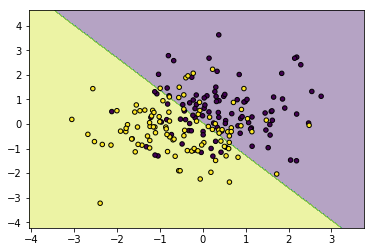

In [53]:
NN_model = MLPClassifier(alpha = .00001, activation = "identity", solver='lbfgs')
NN_model.fit(X,y);

PlotBoundaries(NN_model, X, y)

We see we find the same boundary. Strong regularization leads our model to work in the linear(ish) range of the sigmoid function.

### Multi Class Neural Networks

The final topic we will cover with classification neural networks is multi-class classification. Recall, we said a neural network had built in multi-class capabilities. We just need to create one neuron per class in the output layer. If we feed in some multi class data:

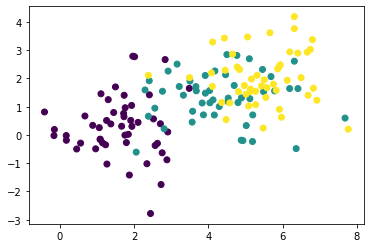

In [31]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Add some noise to the data
random_state = np.random.RandomState(10)
n_samples, n_features = X.shape
X = X + (random_state.randn(n_samples, n_features))

X = X[:,[2,3]]

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

And fit and visualize the neural network boundaries:

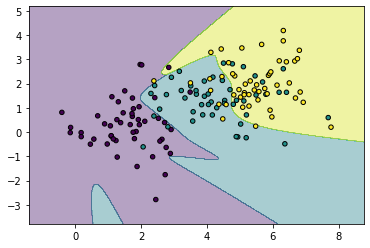

In [33]:
NN_model = MLPClassifier(alpha = .00001, activation = "logistic", solver='lbfgs')
NN_model.fit(X,y);

PlotBoundaries(NN_model, X, y)

We get some pretty non-convex regions. But if we fit a network which is highly regularized, forcing the weights to keep the activation functions in their linear range, we get:

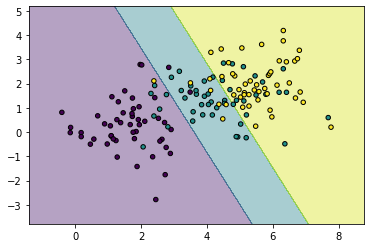

In [34]:
NN_model = MLPClassifier(alpha = 10, activation = "logistic", solver='lbfgs')
NN_model.fit(X,y);

PlotBoundaries(NN_model, X, y)

Regions which look pretty convex. It looks like they could been generated by a logistic regression model. If we really want to directly compare against a logistic regression let's fit a model with the identity activation:

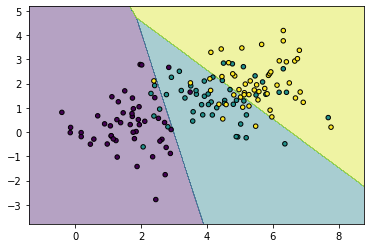

In [35]:
NN_model = MLPClassifier(activation = "identity", solver='lbfgs')
NN_model.fit(X,y);

PlotBoundaries(NN_model, X, y)

And also fit some one vs all logistic regressions:

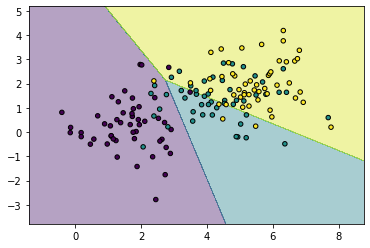

In [36]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X,y);

PlotBoundaries(LR_model, X, y)

These last three boundaries are pretty simple. 

This isn't too surprising. Recall, the final layer of the last two neural network is just three functions, each a linear combination of their own set of weights. Our classification choice was the most confident output neuron. This is just like logistic regression, we have one sigmoid function, which is just a linear function of its input weights, for each class and we take the most confident out of them as our classification choice.

So why is it the first network is so different? The outputs of the neurons are in the non-linear range of the sigmoid function. This allows the various levels of the network to learn non-linear features of the two input features. This is the real strength of neural networks, they learn non-linear features of non-linear features of non-linear features of... At the end we're doing a simple linear discrimination but after our data has been run through several layers of non-linear feature transformations. 

What do these features look like? We can't really tell, the data has been transformed many times and the choices made were entirely done by the algorithm. That being said, in a later lecture we will see how some "natural" features do emerge as we progress deeper into the network.

### Neural Networks For Regression

Neural networks are not just a tool for classification, they can also be used for regression. The key is we just leave the output layer activation alone as a numerical output, (rather than using the softmax activation function to turn these outputs into a probability distribution across classes). 

Fitting the network is now exactly the same as before. If the output of our network is $\hat{y}$ and the dependent variable value is $y$ we can get a loss measure at the end, in this case the R2 score:

$$R2_{Loss}(x) = (y-\hat{y})^2$$

The loss for a set of data points is just the sum of these values. With the cost function calculated we can backpropagate the error through the network, updating the weights and finding a better network. Let's run an example with the Boston dataset:

In [7]:
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor

np.random.seed(100)

boston = load_boston()
X = boston.data
y = boston.target

NN_regressor = MLPRegressor().fit(X,y)

print(f"Score: {NN_regressor.score(X,y): 0.3f}")

Score:  0.627


That's a pretty terrible score, what went wrong? 

.

.

.

.

.

.

.

.

We didn't scale the data! As with many models we've seen Neural Networks tend to benefit from scaling. First note they have regularization turned on by default, and as we saw with logistic regression, if your data lies over a diverse range of scales, then regularization can have a huge impact on performance. There's actually another reason which has to do with how gradient descent works, but we'll get to that in a second.

If we re-run the experiment but with the X data scaled:

In [8]:
from sklearn.preprocessing import StandardScaler

X = boston.data
y = boston.target

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

NN_regressor = MLPRegressor().fit(X,y)

print(f"Score: {NN_regressor.score(X,y): 0.3f}")

Score:  0.776


We get a much better result. One thing to note, we have a one dimensional dependent variable, but what if we had a higher dimensional variable:

In [61]:
y1 = boston.target

y2 = y1 / 3
y1 = y1.reshape(-1,1)
y2 = y2.reshape(-1,1)

y = np.concatenate((y1,y2),axis=1)
y.shape

(506, 2)

Now if we fit a neural network and get the shape:

In [62]:
NN_regressor = MLPRegressor().fit(X,y)
NN_regressor.predict(X).shape

(506, 2)

Notice the output is the same shape as the dependent variable, we've fitted one model with a high dimensional dependent variable. This is just like fitting a one dimesional dependent variable but now our cost function looks like:

$$R2_{Loss} = \sum_i (y_i-\hat{y_i})^2$$

That is the cost in each dimension. And as before the cost over a set of points is just the sum of their individual losses.

### Scaling (almost) Always

We've said many times that scaling tends to help with descent-based algorithms (often the documentation for these solvers insist on transforming the data). To understand why, consider a case with two features and doing some gradient descent algorithm with two weights being adjusted, one for each feature.  

If our first feature lies on a wide range, say in the hundreds of thousands, its associated weight will only need to make small adjustments to have a meaningful impact on the prediction and hence the cost. Conversely, if the second feature lay in a very small range, say fractional, its associated weight will require a large change to impact the cost.

We can plot out what cost functions like this would look like:

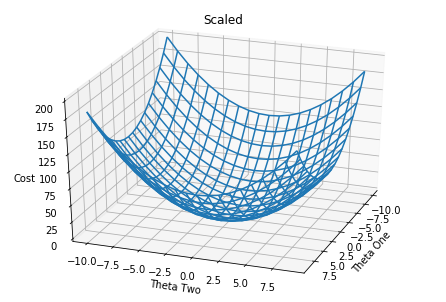

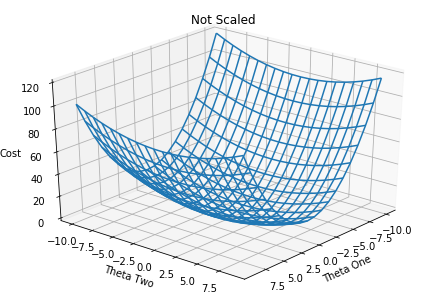

In [63]:
import mpl_toolkits.mplot3d as m3d
import numpy as np

x = np.arange(-10,10,1)
y = np.arange(-10,10,1)
xx, yy = np.meshgrid(x, y)

Z = xx**2+yy**2

fig3d = m3d.Axes3D(plt.figure())
fig3d.plot_wireframe(xx, yy, Z, rstride=1, cstride=1);

fig3d.set_xlabel('Theta One')
fig3d.set_ylabel('Theta Two')
fig3d.set_zlabel('Cost')

fig3d.view_init(30, 20)
plt.title('Scaled')
plt.show();

x = np.arange(-10,10,1)
y = np.arange(-10,10,1)
xx, yy = np.meshgrid(x, y)

Z = xx**2+(yy**2)/5

fig3d = m3d.Axes3D(plt.figure())
fig3d.plot_wireframe(xx, yy, Z, rstride=1, cstride=1);

fig3d.set_xlabel('Theta One')
fig3d.set_ylabel('Theta Two')
fig3d.set_zlabel('Cost')

fig3d.view_init(30, 40)
plt.title('Not Scaled')

plt.show();

In the case of "not scaled features" a change in Theta One results in a large change in error, while a change in Theta Two barely impacts the error. This is not true for the scaled features, here the features have an equal impact. We can also visualize this as a heat map from directly above:

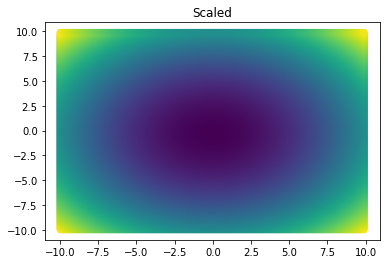

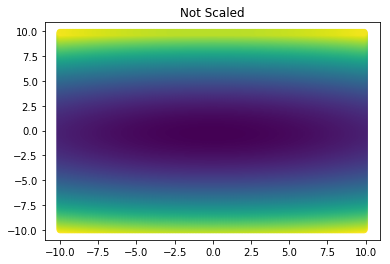

In [64]:
x = np.arange(-10,10,.1)
y = np.arange(-10,10,.1)
xx, yy = np.meshgrid(x, y)
Z = xx**2+yy**2

plt.title("Scaled")
plt.scatter(xx,yy,c=Z)
plt.show()

x = np.arange(-10,10,.1)
y = np.arange(-10,10,.1)
xx, yy = np.meshgrid(x, y)
Z = (xx**2)/10+(yy**2)

plt.title("Not Scaled")
plt.scatter(xx,yy,c=Z)
plt.show()

Notice again in the second case the change is almost entirely dominated by one direction, the first is much more spherical. 

So why is this important? Recall we said that gradient descent was essentially rolling a ball down a (possibly high dimension) hill. What happens when you roll a ball down the above "hills"? In the non-scaled case, we get the feature spanning a large range dominating the direction of the ball, this can lead to slower convergence and poor performance. In the scaled case, we are removing any bias that feature scale can have on the algorithm. 

One note of caution. This is a highly idealized example, there are only two features and only one local/global minimum. The surfaces we tend to deal with are much more complex, with many local minima that we can become trapped in. But the point still remains that by scaling data we remove any arbitrary effects from differences in feature scale. This generally leads to better performance.

### Applying Neural Networks

For most tasks, a Neural Network is probably overkill. Our first example only had two-hundred data points with two features each. Our most complex network for this dataset had almost two hundred neurons and over six-thousand edges between hidden units. 

6,000+ edge weights to build a model for 200 two-dimensional data points... 

This is an *incredibly* complex structure, and it only had four hidden layers. Larger industrial networks have hundreds of hidden layers with hundreds of neurons per layer. Really large networks used for image analysis, such as VGG Net, can have millions of edges. Unless we have a large amount of data, hundreds of thousands (often millions) of high dimensional points, we'll probably overfit most of the time. 

### What can Neural Networks do:

In recent years neural networks have seen an explosion in popularity. They have several diverse applications. Here we will see just a few of them:

### AlphaGo

Go is a board game from China invented in the 4th century BC and today it is massively popular. The rules are fairly simple, but because of the number of possible states of the game, there are more feasible game states than there are atoms in the universe. It was widely considered impossible for a computer to surpass top human players.

<img src= "https://upload.wikimedia.org/wikipedia/commons/2/2a/FloorGoban.JPG" width=300 height=300>

AlphaGo is a Go bot that is built using reinforcement learning on Neural Networks. (Reinforcement learning is covered in a different lecture.) In 2016 it played the top Go player in the world Lee Sedol, here is his reaction after AlphaGo launched a suprise attack during their tournament:

<img src= "https://i.imgur.com/9hDSoQb.gif" width=300 height=300>

Eventually AlphaGo won the tournament four games to one, here was' Lee Sedol's reaction:

<img src= "https://i.imgur.com/0s1yIYg.gif" width=300 height=300>

After his defeat, Lee's government decided to invest $850 million into AI research...

Now a variety of games, such as Pacman, Mario and Texas Hold-Em Poker have been mastered by deep learning systems. 

### Deep Dream

Neural Networks have always been very good at recognizing images. A recent, and rather surreal, application of image recognition networks has been blending image styles together. We could start with a simple image, say the jelly fish:

<img src= "https://upload.wikimedia.org/wikipedia/commons/1/19/Aurelia-aurita-3.jpg" width=300 height=300>

Then take a neural network that is trained to recognize dog images to make the jelly fish *slightly* more dog-like...

<img src="https://upload.wikimedia.org/wikipedia/commons/8/89/Aurelia-aurita-3-0009.jpg" width=300 height=300>

Or *really* dog-like...

<img src="https://upload.wikimedia.org/wikipedia/commons/6/65/Aurelia-aurita-3-0049.jpg" width=300 height=300>

In the PyTorch lecture, we'll actually talk about how the network was able to modify the image to look like this.

### Natural Language Data and Ethics

Neural Networks tend to handle text and speech data very well. Google's translation software is now based around deep networks:

https://translate.google.com/#auto/de/Translation%20has%20greatly%20improved%20with%20Neural%20Networks.%0ABefore%20this%20would%20be%20gibberish

A few years ago they were mainly using handwritten rules, today's system is miles ahead of this.

With these learning techniques becoming more powerful, there has been a push for ethics and fairness in machine learning and AI. One push has been for data scientists to decline working on "unethical" projects like weapons development. From a more subtle standpoint, but one much more relevant to everyday life, people have also become concerned with built-in biases in our models. It may that be our model learns undesirable behavior, and continues to exhibit that behavior throughout its usage. 

### Real Time Network

To see a live neural network implementation check out:

http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.14205&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

### Exercise

1. What are a few cases where a high learning rate helps? What about cases where it hurts? It can help to draw out a one-dimensional error surface with lots of hills in it.
2. Repeat the previous question but now consider momentum.
3. Say we had a regression with two targets (that is $y$ has two dimensions to it). Is one Neural Network with two output units the same as two linear regressions (one for each dimension of $y$)? What if we require that the Neural Network only uses the identity function? What about two neural networks, (one for each dimension of $y$).

<div id="container" style="position:relative;">
<div style="position:relative; float:right"><img style="height:25px""width: 50px" src ="https://drive.google.com/uc?export=view&id=14VoXUJftgptWtdNhtNYVm6cjVmEWpki1" />
</div>
</div>